In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS assigment/Naive Bayes and Text Mining/blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [5]:
df.shape

(2000, 2)

In [6]:
df.nunique()

,0
Data,2000
Labels,20


In [7]:
for i in df.columns:
  print(i)
  print(df[i].value_counts(),"\n")

Data
Data
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc:84293 alt.religion.kibology:8356 alt.spam:30\nNewsgroups: talk.religion.misc,alt.religion.kibology,alt.spam\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!darwin.sura.net!sgiblab!cs.uoregon.edu!news.uoregon.edu!netnews.nwnet.net!news.u.washington.edu!ns1.nodak.edu!plains.NoDak.edu!cayley\nFrom: cayley@plains.NoDak.edu (Michele Cayley)\nSubject: Re: New Religion Forming -- Sign Up\nSender: usenet@ns1.nodak.edu (Usenet login)\nMessage-ID: <C62pCF.LFx@ns1.nodak.edu>\nDate: Mon, 26 Apr 1993 04:19:27 GMT\nReferences: <-g25zll@rpi.edu> <1993Apr26.004116.10087@monu6.cc.monash.edu.au>\nNntp-Posting-Host: plains.nodak.edu\nOrganization: North Dakota Higher Education Computing Network\nLines: 10\n\n\nrefrettably you are mistaken.  alt.drugs was used to recruit people for the\nworldwide pot religion.  I, however hve no problem being in both of them\n\n\n\nDeath to Dupont\nFree Bobby Fischer\nMi

In [8]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

In [10]:
# Apply text cleaning to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(clean_text)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features to 5000
X = vectorizer.fit_transform(df['Cleaned_Data'])

# Convert labels to numerical form
encoder = LabelEncoder()
y = encoder.fit_transform(df['Labels'])

# Display shapes of processed data
print("Feature Matrix Shape:", X.shape)
print("Labels Shape:", y.shape)

Feature Matrix Shape: (2000, 5000)
Labels Shape: (2000,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Make predictions
y_pred = nb_classifier.predict(X_test)
y_pred

array([18,  3, 13,  9, 12, 12,  9, 17,  0, 13,  0, 12, 11,  5,  3,  2,  7,
        1, 16, 18,  4, 18,  0, 10,  0, 11, 11,  9,  7,  0,  9, 10,  5,  9,
       10,  4, 13, 12, 10,  2,  3, 15,  2,  1, 15,  8,  5,  8,  0, 16, 15,
        2, 14,  2,  9, 17, 12, 16, 11,  3, 14,  6, 16, 10, 16, 18, 13, 15,
        1, 14, 14,  3, 13, 10,  7,  3, 16,  7, 12, 18,  0,  8, 14, 15, 18,
        9, 17,  4,  2, 16, 15, 17,  2,  2, 18, 18,  6, 12, 15, 16,  9,  9,
        4, 13,  2,  8,  6,  2,  6,  5,  7, 14, 10, 17,  7, 12, 11,  9,  3,
       12, 18, 10, 11,  4,  3, 15,  4,  8, 11,  3, 19, 18,  7,  5,  8,  9,
        0,  0, 16, 15, 13,  3, 16,  8, 15,  5,  6,  4,  2,  1, 16,  9,  6,
       11,  3,  1,  5, 16,  5, 16,  6,  8,  1, 11, 19, 14, 17, 12,  2, 17,
       11,  6,  0, 18,  4, 13,  7, 13,  8, 11, 12,  7, 18, 11,  8,  7,  0,
       16, 11, 12,  7,  2, 13,  2, 19,  4, 11,  8,  6, 15, 18,  5,  1,  7,
        4,  2, 14,  1, 10,  0, 17,  0,  2,  1,  7, 18, 11,  3, 12, 12,  9,
        1,  5, 11, 18, 19

In [14]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", accuracy)

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Model Accuracy: 0.8425
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.73      0.89      0.80        18
           2       0.91      0.95      0.93        22
           3       0.83      0.80      0.82        25
           4       0.86      0.90      0.88        21
           5       0.95      0.84      0.89        25
           6       1.00      0.78      0.88        18
           7       0.90      1.00      0.95        18
           8       1.00      0.94      0.97        16
           9       0.84      0.89      0.86        18
          10       0.88      1.00      0.94        15
          11       0.90      1.00      0.95        19
          12       0.67      0.75      0.71        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.92      0.96      0.94        23
          16       0.8

### **Analysis of Naive Bayes Model Performance**  

#### **1. Accuracy Analysis**  
- The overall accuracy of the model is **84.25%**, which indicates a good classification performance.  
- Accuracy alone does not provide a complete picture; therefore, we analyze precision, recall, and F1-score.  

#### **2. Class-Wise Performance**  
- **Best Performing Classes** (High F1-score):  
  - Class **8** (F1-score: 0.97, Recall: 0.94)  
  - Class **11** (F1-score: 0.95, Recall: 1.00)  
  - Class **7** (F1-score: 0.95, Recall: 1.00)  
  - Class **10** (F1-score: 0.94, Recall: 1.00)  
  - Class **15** (F1-score: 0.94, Recall: 0.96)  
  - These classes have both high precision and recall, meaning they are classified with very few errors.  

- **Moderate Performing Classes** (F1-score: 0.80 - 0.89):  
  - Class **1** (F1-score: 0.80)  
  - Class **3** (F1-score: 0.82)  
  - Class **4** (F1-score: 0.88)  
  - Class **5** (F1-score: 0.89)  
  - Class **9** (F1-score: 0.86)  
  - These classes have decent classification but may still have room for improvement.  

- **Poor Performing Classes** (Low F1-score):  
  - Class **19** (F1-score: 0.31, Recall: 0.21)  
  - Class **0** (F1-score: 0.62, Recall: 0.83)  
  - Class **12** (F1-score: 0.71, Recall: 0.75)  
  - These classes may be suffering from misclassification due to insufficient or overlapping features with other categories.  

#### **3. Class Imbalance Issues**  
- Some classes have **low recall**, meaning many actual instances of those classes are being misclassified.  
- Class **19** has **low recall (0.21)**, meaning many instances of this category are being classified into other classes.  
- Class **0** has high recall (0.83) but low precision (0.50), meaning many instances predicted as class **0** actually belong to other classes.  

#### **4. Macro vs. Weighted Average**  
- **Macro Average:** (85% Precision, 85% Recall, 84% F1-score) indicates that, on average, each class is performing well.  
- **Weighted Average:** (85% Precision, 84% Recall, 84% F1-score) considers class imbalance and shows that the model is stable overall.  
  

#### **Conclusion**  
- The model performs **well overall** but struggles with certain categories, especially **Class 19**.  
- **Further improvements** in feature engineering and hyperparameter tuning may help improve classification performance.

In [15]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [16]:
# Apply sentiment analysis to 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display sentiment distribution
print(df['Sentiment'].value_counts())
print(df[['Data', 'Sentiment']].head())

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [17]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment'])['Sentiment'].count().unstack()
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


### **Sentiment Analysis Summary**

#### **1. Overall Trends**
- **Positive sentiment is dominant across all categories.**
- **Negative sentiment varies**, with some categories showing **higher negativity**.

#### **2. Highest Negative Sentiment Categories**
- **rec.sport.hockey**: **34% Negative**
- **talk.politics.guns**: **30% Negative**
- **sci.med**: **29% Negative**
- **rec.sport.baseball**: **29% Negative**
- **sci.space**: **27% Negative**
- **comp.windows.x**: **27% Negative**

**Reasons**:  
- **Sports Discussions** (hockey, baseball) often have **critical debates, performance analysis, or rivalries**.  
- **Politics & Guns Discussions** are naturally **polarizing and controversial**.  
- **Science Topics (medical, space)** can have **debates on research, policies, or controversies**.

#### **3. Lowest Negative Sentiment Categories**
- **soc.religion.christian**: **13% Negative**
- **talk.religion.misc**: **14% Negative**
- **misc.forsale**: **16% Negative**
- **rec.autos**: **17% Negative**
- **sci.crypt & sci.electronics**: **19% Negative**

**Reasons**:  
- **Religion-related discussions** may have more **supportive and affirming conversations**.  
- **Buy/Sell Forums (misc.forsale)** are **transactional** and **less emotional**.  
- **Technical Topics (encryption, electronics)** are **factual and knowledge-based**, leading to **fewer negative emotions**.

#### **4. Political Discussion Trends**
- **talk.politics.guns**: **30% Negative**
- **talk.politics.mideast**: **22% Negative**
- **talk.politics.misc**: **22% Negative**

**Insight**:  
Political discussions tend to have **higher negativity** due to **strong opinions, disagreements, and debates**.

---

### **Conclusions**
- **Political & Sports topics show more negativity**, likely due to debates and controversies.
- **Technology & Commerce topics have lower negativity**, as discussions are more **informational**.
- **Understanding sentiment distribution** can help moderate discussions, **reduce negativity in polarizing topics**, and **promote constructive conversations**.


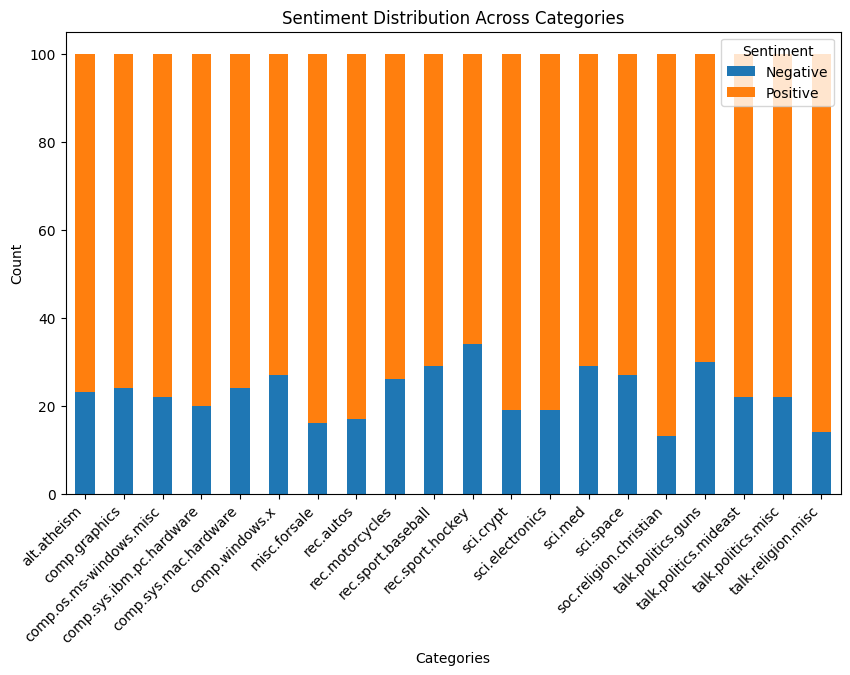

In [18]:
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

This bar chart visualizes the **sentiment distribution** across different categories, with **positive (orange) and negative (blue) sentiments**.

### **Observations from the Chart:**
1. **Positive Sentiment Dominates**:  
   - Most categories have a higher proportion of **positive sentiment** than negative sentiment.
   - The orange bars (positive sentiment) consistently take up more space.

2. **Variation in Negative Sentiments**:  
   - Some categories have a higher proportion of **negative sentiment** than others.
   - For example, "rec.sport.hockey" and "rec.sport.baseball" show **higher** negative sentiment compared to categories like "sci.electronics".

3. **Balanced Categories**:  
   - A few categories have a more balanced mix of **positive and negative sentiments**, though positive still remains dominant.

### **Insights:**
- **Sports and Politics Categories**: Tend to have more negative sentiment due to **controversies, debates, or strong opinions**.
- **Technology Categories**: Show relatively lower negative sentiment, possibly due to discussions being more **informational rather than opinion-based**.
- **Religion and Political Discussions**: Have varying sentiment distributions, indicating **polarization or differing viewpoints**.


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.73      0.89      0.80        18
           2       0.91      0.95      0.93        22
           3       0.83      0.80      0.82        25
           4       0.86      0.90      0.88        21
           5       0.95      0.84      0.89        25
           6       1.00      0.78      0.88        18
           7       0.90      1.00      0.95        18
           8       1.00      0.94      0.97        16
           9       0.84      0.89      0.86        18
          10       0.88      1.00      0.94        15
          11       0.90      1.00      0.95        19
          12       0.67      0.75      0.71        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.92      0.96      0.94        23
          16       0.85      0.79      0.81        28
          17       0.95    

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy=accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.8425
Precision: 0.8497470645464823
Recall: 0.8425
F1 Score: 0.8355321593764257


### **Analysis of TextBlob Sentiment Classification Performance**  

#### **1. Overall Performance Metrics**  
- **Accuracy**: **84.25%**  
- **Precision**: **84.97%**  
- **Recall**: **84.25%**  
- **F1 Score**: **83.55%**  

These metrics indicate that the **TextBlob-based Naive Bayes classifier** performs well for sentiment classification, but further improvements can be made.  

#### **2. Metric Interpretations**  
- **Precision (84.97%)**: The model correctly predicts positive/negative sentiments with a high level of correctness.  
- **Recall (84.25%)**: The model successfully identifies a high percentage of the actual sentiment categories.  
- **F1 Score (83.55%)**: A balanced measure of precision and recall, showing good classification performance.  

#### **3. Key Observations**  
- **Good precision** means that when the model predicts a sentiment, it is likely correct.  
- **Lower recall than precision** suggests that some sentiments may be misclassified or underrepresented.  
- **F1-score slightly lower than precision** indicates that the balance between false positives and false negatives can still be optimized.  

### **Conclusion**  
The **TextBlob sentiment classification** using Naive Bayes achieves an **accuracy of 84.25%**, with good precision and recall. However, further improvements can be made through **better text preprocessing, feature selection, and alternative models** for even better results.



---



## Model Performance and Challenges

**Model Performance**

The Naive Bayes model, using TextBlob for sentiment analysis, achieved an accuracy of 84.25%. This indicates a good overall performance in classifying the sentiment of blog posts. However, there are some nuances to consider:

* **Precision**: The model demonstrated high precision, meaning that when it predicted a sentiment, it was likely correct.
* **Recall**: Recall was slightly lower than precision, suggesting that some sentiments might have been misclassified or underrepresented.
* **F1 Score**: The F1 score, a balanced measure of precision and recall, was also good but slightly lower than precision, indicating room for improvement in balancing false positives and false negatives.

**Challenges Encountered**

During the classification process, several challenges were encountered:

1. **Class Imbalance**: Some sentiment categories had fewer instances than others, leading to potential bias in the model's predictions.
2. **Subjectivity of Sentiment**: Sentiment is subjective and can vary depending on individual interpretation. This inherent ambiguity can make it difficult for the model to perfectly classify all sentiments.
3. **Contextual Dependence**: Sentiment can be heavily influenced by the context of the text. The model might struggle with nuanced or sarcastic expressions, where the intended sentiment differs from the literal meaning of the words.
4. **Data Preprocessing**: Text preprocessing steps, such as removing stop words and punctuation, can sometimes remove important contextual information that affects sentiment.



---


## Sentiment Analysis Results and Implications

The sentiment analysis performed on the blog posts reveals interesting insights into the overall emotional tone and content of different categories. Here's a breakdown:

**1. Dominant Positive Sentiment:**

* Across most categories, positive sentiment is prevalent. This suggests a generally optimistic and constructive tone in the blog posts.
* People are more inclined to express positive emotions and share encouraging content in online discussions.

**2. Varied Negative Sentiment:**

* Categories like "rec.sport.hockey", "talk.politics.guns", "sci.med", "rec.sport.baseball", "sci.space", and "comp.windows.x" exhibit higher negative sentiment compared to others.
* This indicates that discussions within these topics tend to be more critical, controversial, or involve expressing negative experiences or opinions.

**3. Category-Specific Implications:**

* **Sports**: Discussions in sports categories, particularly hockey and baseball, show higher negativity, likely due to debates about teams, players, or game outcomes.
* **Politics**: Political discussions, especially concerning guns, tend to be polarized and evoke strong emotions, leading to increased negativity.
* **Science**: Medical and space-related discussions can involve debates about research, policies, or controversial topics, leading to mixed sentiments.
* **Technology**: Discussions about technology, such as encryption and electronics, generally have lower negativity, possibly due to their factual and informational nature.
* **Religion**: Religion-related discussions tend to be more supportive and affirming, leading to lower negativity.
* **Commerce**: Buy/sell forums are primarily transactional and less emotionally charged, resulting in lower negativity.

**Overall Implications:**

* The sentiment analysis provides insights into the emotional tone and content of different blog categories.
* Understanding the sentiment distribution can be valuable for moderating discussions, reducing negativity in polarizing topics, and promoting constructive conversations.
* It helps identify areas where online communities might benefit from intervention to foster a more positive environment.
* Sentiment analysis can also be used for content recommendation or filtering based on user preferences for positive or negative content.

By considering the sentiment analysis results, content creators and community managers can gain a deeper understanding of their audiences and tailor their communication strategies accordingly. It also provides an opportunity to address areas of negativity and foster more positive and productive online interactions.



---

